# Temperature Forecast Project using ML

## Problem Statement:

### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

#for plotting and EDA
import seaborn as sns
import matplotlib.pyplot as plt

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

#for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#for model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#displaying maximum columns
pd.set_option('display.max_columns',None)

#there is column called date, so we are using parse date for that column
df = pd.read_csv('Temperature_forecast.csv',parse_dates= ['Date'])
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
#checking shape
df.shape

(7752, 25)

we have **7752** rows and **25** columnn including 2 target columns.

In [4]:
#checking columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [5]:
#checking datatypes
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

We can see that all the columns are float datatype , date column is date datetype

### Checking Null values

In [6]:
#lets check for null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

we can see that most of the columns are having null values.

### Statistical Summary

In [7]:
#checking statistical summary
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


LDAPS_RHmax,LDAPS_Tmin_lapse, Solar radiation, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM and Slope have skewness becuase their mean and std have too much difference.

LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 have too many outlier because their 75% and max value have too much difference.

### Checking Correlation

In [8]:
#lets check for correlation among all the columns
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,0.003414,0.000698,0.006159,-0.002748,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,-0.215816,-0.145513,-0.142497,-0.110001,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,0.091439,-0.002839,-0.045091,0.114312,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,0.689679,0.514075,0.262665,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,0.226957,0.130619,0.268449,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,-0.541327,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,-0.044018,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,0.242991,0.220533,0.152587,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,-0.245583,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,0.517493,0.361046,0.446328,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


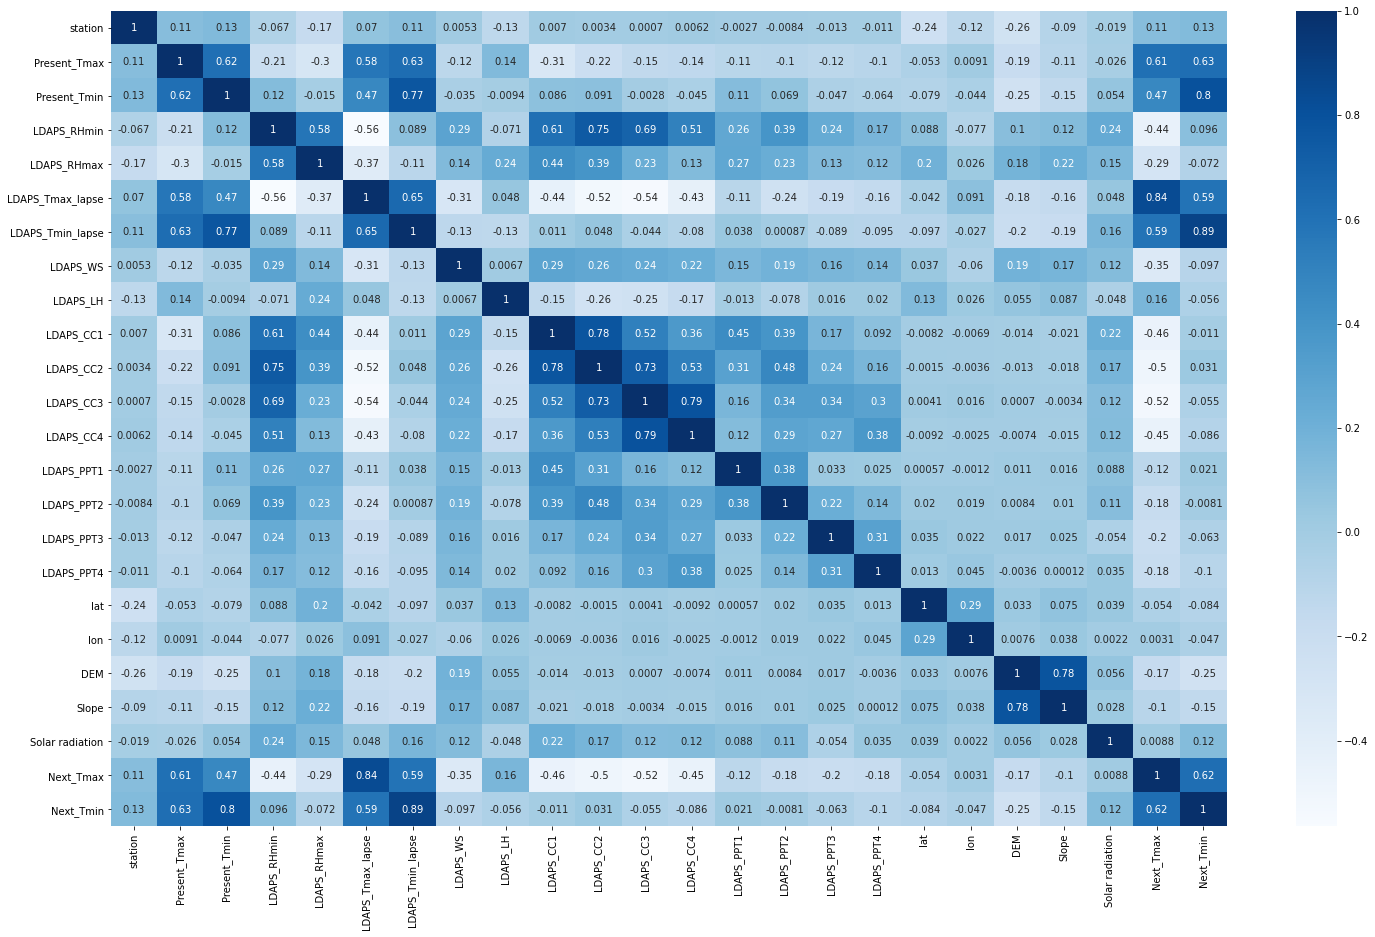

In [9]:
#correlation
fig = plt.figure(figsize=(25,15))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [10]:
#lets check for the correlation of input columns with first Target Variable (TMAX)
cor_matrix['Next_Tmax'].sort_values(ascending = False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.836144
Next_Tmin           0.621427
Present_Tmax        0.613109
LDAPS_Tmin_lapse    0.593195
Present_Tmin        0.473868
LDAPS_LH            0.159324
station             0.108306
Solar radiation     0.008809
lon                 0.003060
lat                -0.053567
Slope              -0.102838
LDAPS_PPT1         -0.120079
DEM                -0.172674
LDAPS_PPT2         -0.180449
LDAPS_PPT4         -0.180669
LDAPS_PPT3         -0.196845
LDAPS_RHmax        -0.286478
LDAPS_WS           -0.346592
LDAPS_RHmin        -0.442958
LDAPS_CC4          -0.451324
LDAPS_CC1          -0.457583
LDAPS_CC2          -0.496251
LDAPS_CC3          -0.520706
Name: Next_Tmax, dtype: float64

Next_Tmax is highly positively correlated with LDAPS_Tmax_lapse and highly negatively correlated with LDAPS_CC3.

In [11]:
#lets check for the correlation of input columns with Second Target Variable (TMIN)
cor_matrix['Next_Tmin'].sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886964
Present_Tmin        0.799758
Present_Tmax        0.625252
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.591535
station             0.128719
Solar radiation     0.120400
LDAPS_RHmin         0.095830
LDAPS_CC2           0.031500
LDAPS_PPT1          0.021486
LDAPS_PPT2         -0.008131
LDAPS_CC1          -0.011129
lon                -0.046737
LDAPS_CC3          -0.055217
LDAPS_LH           -0.055895
LDAPS_PPT3         -0.063318
LDAPS_RHmax        -0.072490
lat                -0.083621
LDAPS_CC4          -0.085805
LDAPS_WS           -0.097390
LDAPS_PPT4         -0.104515
Slope              -0.147043
DEM                -0.247100
Name: Next_Tmin, dtype: float64

Next_Tmin is highly positively correlated with LDAPS_Tmax_lapse.

## Data PreProcessing

### Handling the Null values in the dataset

In [12]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [13]:
#we can see that all the belows column are null for the same rows

df.loc[df.LDAPS_RHmin.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1025,1.0,2013-10-08,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3
1026,2.0,2013-10-08,29.7,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2
1027,3.0,2013-10-08,29.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0
1028,4.0,2013-10-08,30.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5
1029,5.0,2013-10-08,29.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,21.0,2016-08-20,34.1,27.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5507,127.040,26.2980,0.5721,4795.120117,35.5,27.5
5946,22.0,2016-08-20,34.3,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5102,127.086,21.9668,0.1332,4782.181641,36.2,27.5
5947,23.0,2016-08-20,34.6,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5372,126.891,15.5876,0.1554,4783.152832,37.3,28.8
5948,24.0,2016-08-20,35.0,28.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.5237,126.909,17.2956,0.2223,4778.877930,37.0,28.7


### Since all the columns are numerical, Before replacing the outliers we need check for the following citeria:
    

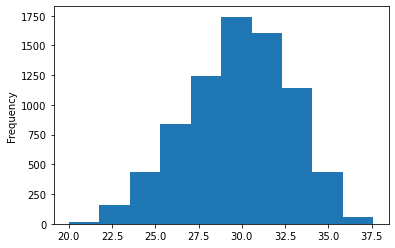

In [14]:
#lets check the distribution of this column
df.Present_Tmax.plot.hist()
plt.show()

In [15]:
# Above column is normal distributed so lets replace outliers with mean
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(),inplace= True)

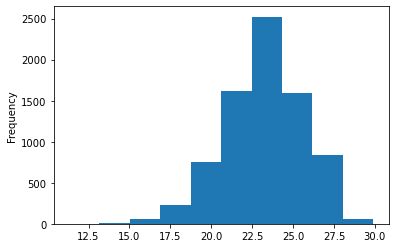

In [16]:
#lets check the distribution of this column
df.Present_Tmin.plot.hist()
plt.show()

In [17]:
# Above column is not normal distributed so lets replace outliers with median
df['Present_Tmin'].fillna(df['Present_Tmin'].median(),inplace= True)

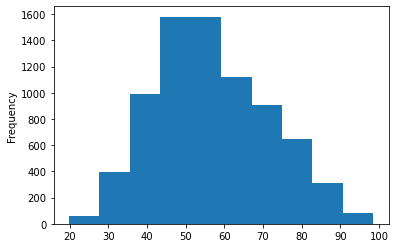

In [18]:
#lets check the distribution of this column
df.LDAPS_RHmin.plot.hist()
plt.show()

In [19]:
# Above column is normal distributed so lets replace outliers with mean
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(),inplace= True)

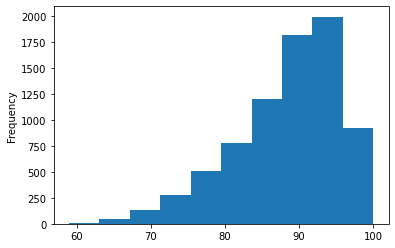

In [20]:
#lets check the distribution of this column
df.LDAPS_RHmax.plot.hist()
plt.show()

In [21]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median(),inplace= True)

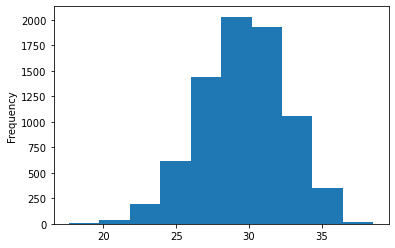

In [22]:
#lets check the distribution of this column
df.LDAPS_Tmax_lapse.plot.hist()
plt.show()

In [23]:
# Above column is normal distributed so lets replace outliers with mean
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(),inplace= True)

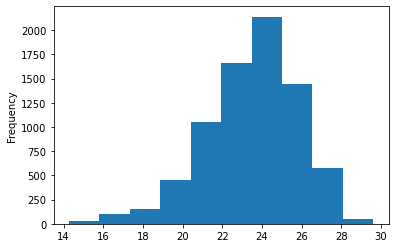

In [24]:
#lets check the distribution of this column
df.LDAPS_Tmin_lapse.plot.hist()
plt.show()

In [25]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].median(),inplace= True)

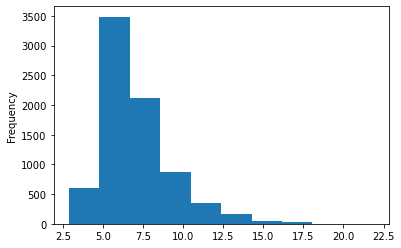

In [26]:
#lets check the distribution of this column
df.LDAPS_WS.plot.hist()
plt.show()

In [27]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_WS'].fillna(df['LDAPS_WS'].median(),inplace= True)

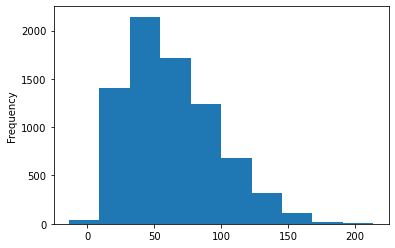

In [28]:
#lets check the distribution of this column
df.LDAPS_LH.plot.hist()
plt.show()

In [29]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_LH'].fillna(df['LDAPS_LH'].median(),inplace= True)

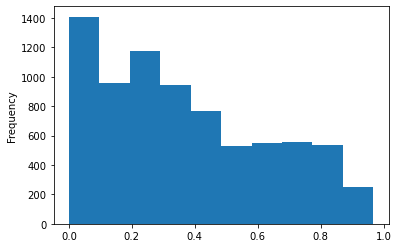

In [30]:
#lets check the distribution of this column
df.LDAPS_CC1.plot.hist()
plt.show()

In [31]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].median(),inplace= True)

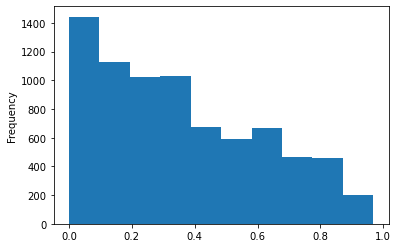

In [32]:
#lets check the distribution of this column
df.LDAPS_CC2.plot.hist()
plt.show()

In [33]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].median(),inplace= True)

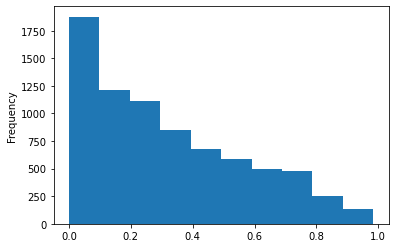

In [34]:
#lets check the distribution of this column
df.LDAPS_CC3.plot.hist()
plt.show()

In [35]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median(),inplace= True)

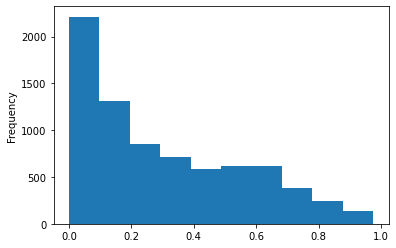

In [36]:
#lets check the distribution of this column
df.LDAPS_CC4.plot.hist()
plt.show()

In [37]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median(),inplace= True)

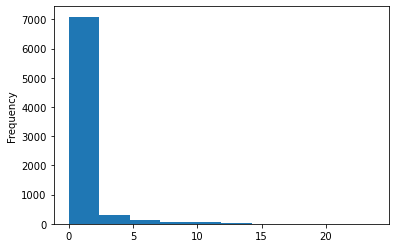

In [38]:
#lets check the distribution of this column
df.LDAPS_PPT1.plot.hist()
plt.show()

In [39]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].median(),inplace= True)

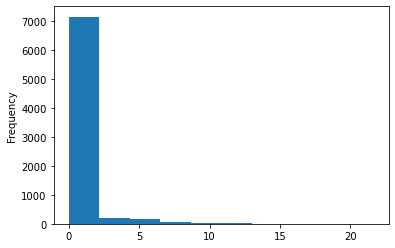

In [40]:
#lets check the distribution of this column
df.LDAPS_PPT2.plot.hist()
plt.show()

In [41]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].median(),inplace= True)

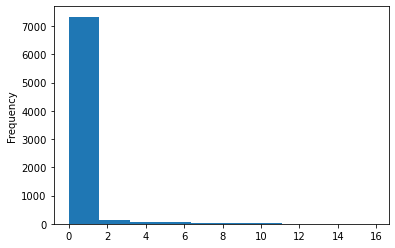

In [42]:
#lets check the distribution of this column
df.LDAPS_PPT3.plot.hist()
plt.show()

In [43]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].median(),inplace= True)

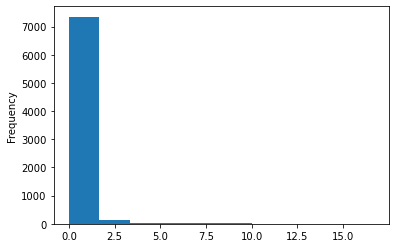

In [44]:
#lets check the distribution of this column
df.LDAPS_PPT4.plot.hist()
plt.show()

In [45]:
# Above column is not normal distributed so lets replace outliers with median
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].median(),inplace= True)

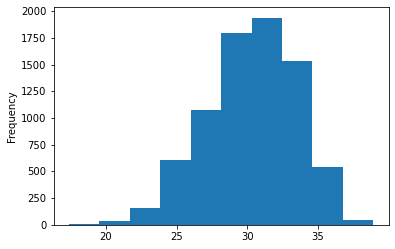

In [46]:
#lets check the distribution of this column
df.Next_Tmax.plot.hist()
plt.show()

In [47]:
# Above column is normal distributed so lets replace outliers with mean
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(),inplace= True)

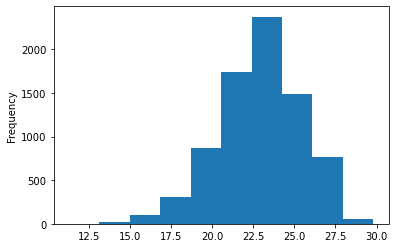

In [48]:
#lets check the distribution of this column
df.Next_Tmin.plot.hist()
plt.show()

In [49]:
# Above column is  almost normal distributed so lets replace outliers with mean
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(),inplace= True)

In [50]:
#lets check for null values now
for i in df.columns:
    if df[i].isnull().sum() > 1:
        print(i,df[i].isnull().sum())

station 2
Date 2


In [51]:
station_mode = df['station'].mode()[0]
station_mode

1.0

In [52]:
#still we have two null values for each of the two columns columns
#station column should be converted to  object datatype, since stattion is not numerical value
#so for station column, we can replace null values with mean or median, it has to replaced with mode
station_mode = df['station'].mode()[0]
df['station'] = df['station'].replace(np.nan,station_mode)

In [53]:
df.station.isnull().sum()

0

In [54]:
#for date column since we have only two rows which is less than 0.01 percent
#if there were many null values in this column, we could have extracted mode of date, month and year
#we can drop the rows with null values
df.dropna(axis = 0, inplace = True)

In [55]:
#now there are no null values in this dataset
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [56]:
df.shape

(7750, 25)

## Feature Extraction

In [57]:
#Lets Extract the month from the date column, since the temperature  depends on month 
#lets also extract the year as well 

In [58]:
#Changing Date column from object to int for better prediction

import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)
df.head() #Checking top 5 rows of dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [59]:
df.dtypes

station             float64
Date                  int64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

## Data Visualization:

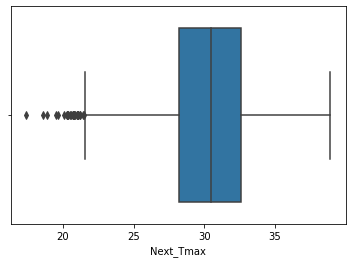

In [60]:
#lets check the box plot of our first target column Next_Tmax, to check if there are outliers
sns.boxplot(df.Next_Tmax)
plt.show()

we can see there are outliers in our first target column Next_Tmax

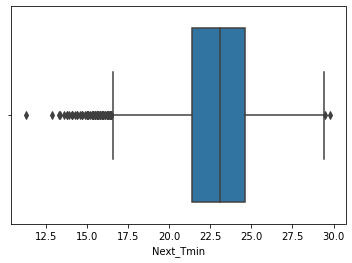

In [61]:
#lets check the box plot of our second target column Next_Tmin, to check if there are outliers
sns.boxplot(df.Next_Tmin)
plt.show()

we can see there are outliers in our second target column Next_Tmin

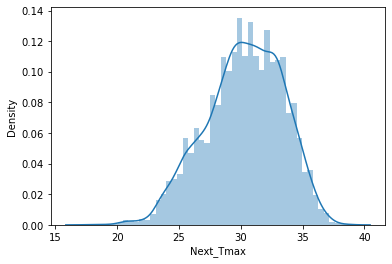

In [62]:
#lets check the distribution of our first target column Next_Tmax
sns.distplot(df.Next_Tmax)
plt.show()

Our first target column Next_Tmax is almost normal distributed.

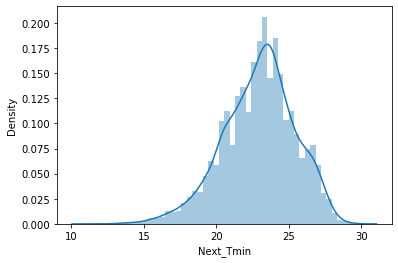

In [63]:
#lets check the distribution of our Second target column Next_Tmin
sns.distplot(df.Next_Tmin)
plt.show()

Our second target column Next_Tmin is slightly skewed

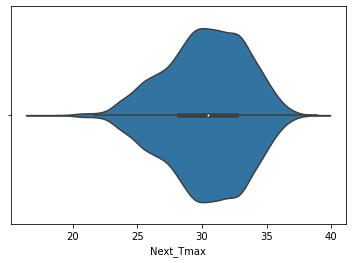

In [64]:
#lets check the violin plot of our First target column Next_Tmax
sns.violinplot(df.Next_Tmax)
plt.show()

The data is distributed between 29 and 33.

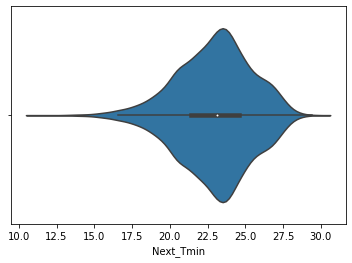

In [65]:
#lets check the violin plot of our Second target column Next_Tmin
sns.violinplot(df.Next_Tmin)
plt.show()

The data is distributed between 20 and 27.

### Bivariate Analysis with First Target Variable Next_Tmax

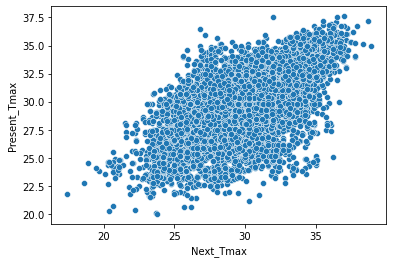

In [66]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['Present_Tmax'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

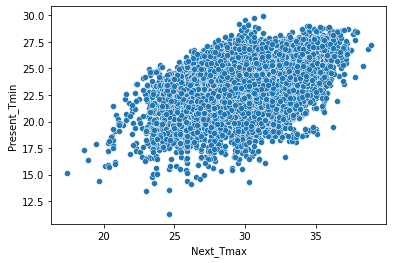

In [67]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['Present_Tmin'] )
plt.show()

we can see from below plot, This column is having positive correlation with our target variable.

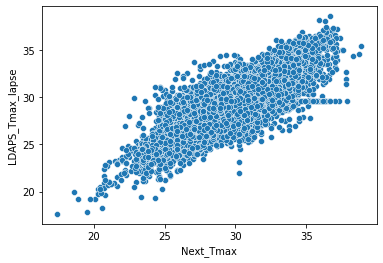

In [68]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_Tmax_lapse'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

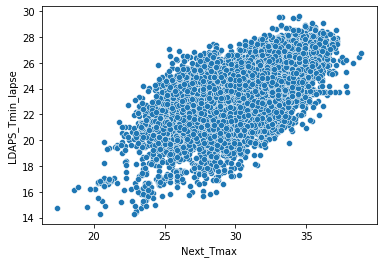

In [69]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_Tmin_lapse'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

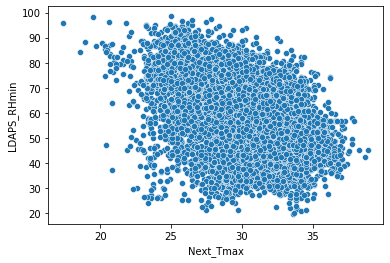

In [70]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_RHmin'] )
plt.show()

we can see from below plot , This column is having slightly negative correlation with our target variable.

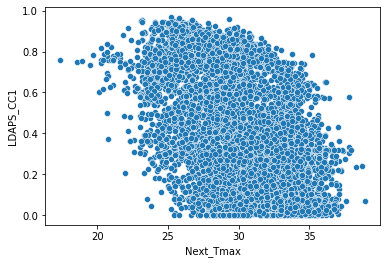

In [71]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_CC1'] )
plt.show()

we can see from below plot , This column is having slightly negative correlation with our target variable.

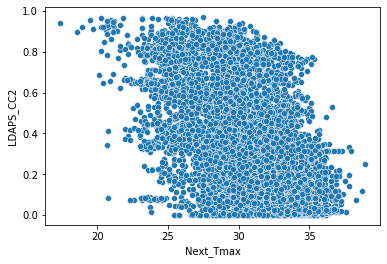

In [72]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_CC2'] )
plt.show()

we can see from below plot , This column is having slightly less negative correlation with our target variable.

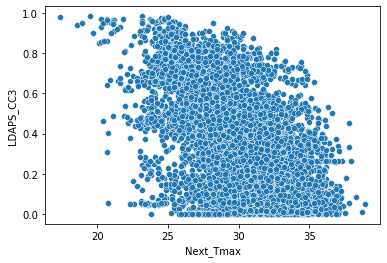

In [73]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_CC3'] )
plt.show()

we can see from below plot , This column is having slightly less negative correlation with our target variable.

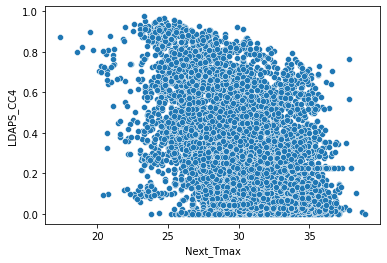

In [74]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmax'] , y =df['LDAPS_CC4'] )
plt.show()

we can see from below plot , This column is having slightly less negative correlation with our target variable.

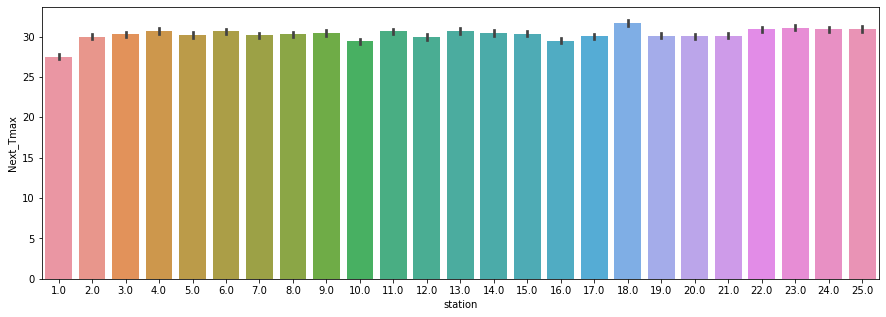

In [77]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
sns.barplot(x = df['station'] , y =df['Next_Tmax'] )
plt.show()

we can see that temperature noted in station 18 is quite high compare to other stations.

### Bivariate Analysis with Second Target Variable Next_Tmin

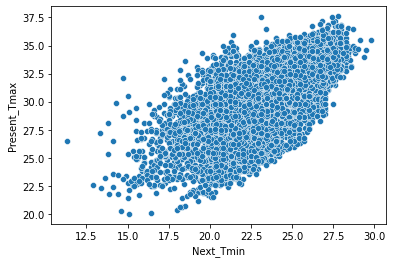

In [78]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['Present_Tmax'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

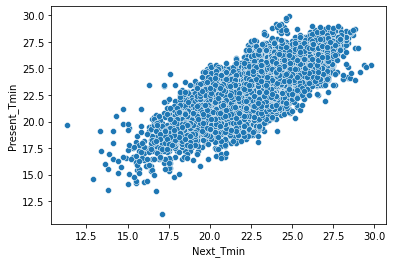

In [79]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['Present_Tmin'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

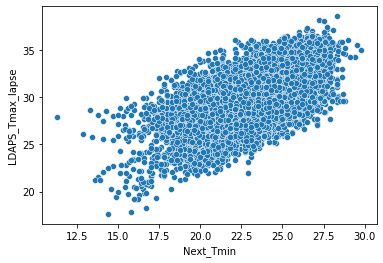

In [80]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['LDAPS_Tmax_lapse'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

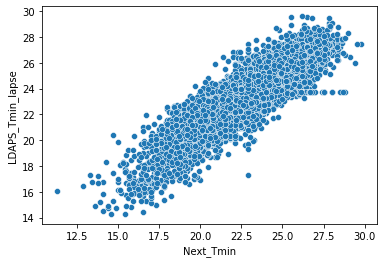

In [81]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['LDAPS_Tmin_lapse'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

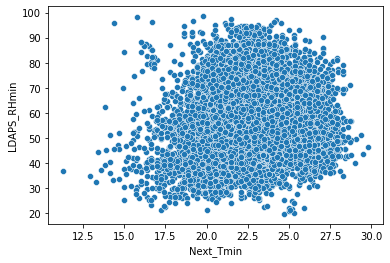

In [82]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['LDAPS_RHmin'] )
plt.show()

we can see from below plot , This column is having slightly positive correlation with our target variable.

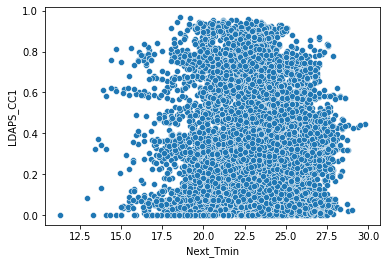

In [83]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['LDAPS_CC1'] )
plt.show()

There is less relation between these columns.

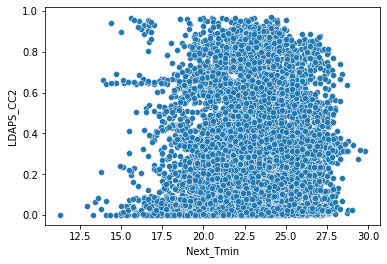

In [84]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['LDAPS_CC2'] )
plt.show()

There is less relation between these columns.

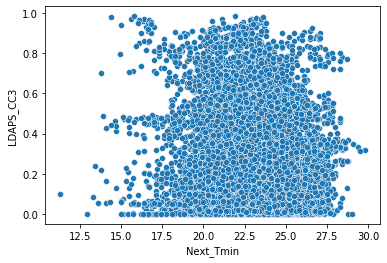

In [85]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['LDAPS_CC3'] )
plt.show()

There is less relation between these columns.

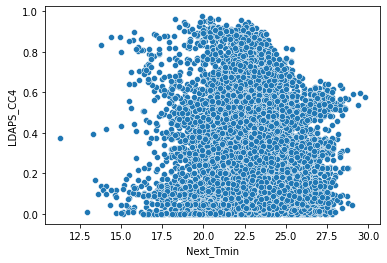

In [86]:
#Lets check this column againt our target variable
sns.scatterplot(x = df['Next_Tmin'] , y =df['LDAPS_CC4'] )
plt.show()

There is less relation between these columns.

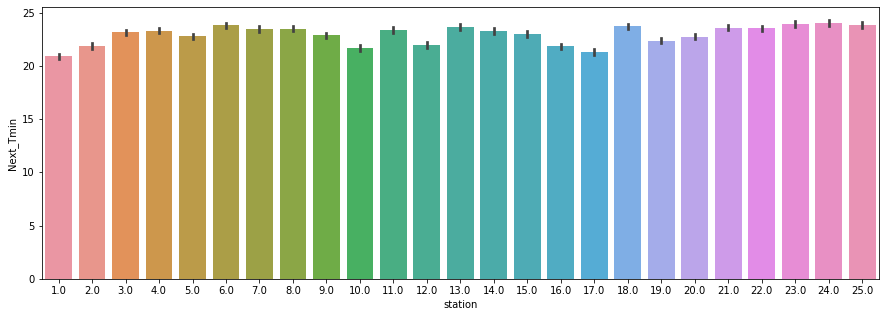

In [88]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
sns.barplot(x = df['station'] , y =df['Next_Tmin'] )
plt.show()

Temperature noted in station 1 is quite low compare to other stations.

### Checking Outliers

In [89]:
#lets create a list of numerical columns for outliers removal

Numerical_columns = []
for i in df.columns:
    if df[i].dtype != 'object':
        Numerical_columns.append(i)
Numerical_columns


['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

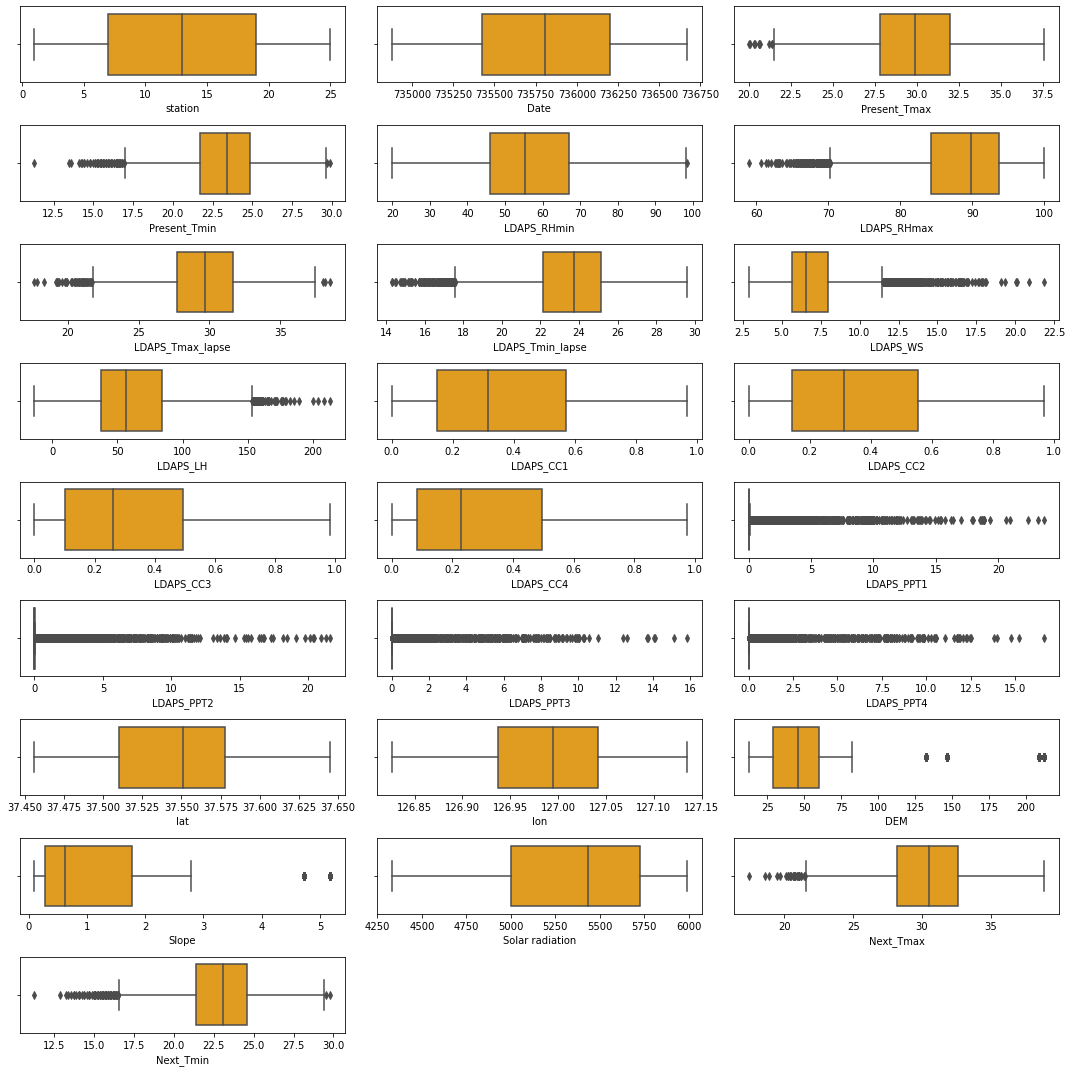

In [93]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 3
nrows =9
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

### Removing Outliers

In [94]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [95]:
#calling the function
for i in Numerical_columns:
    outliers_IQR3(df,i)

now the outliers have been removed for all the columns.

### Checking skewness

In [97]:
df.skew()

station             0.000000
Date               -0.001680
Present_Tmax       -0.255196
Present_Tmin       -0.261009
LDAPS_RHmin         0.300226
LDAPS_RHmax        -0.738462
LDAPS_Tmax_lapse   -0.167690
LDAPS_Tmin_lapse   -0.416531
LDAPS_WS            0.821395
LDAPS_LH            0.602904
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          1.169549
LDAPS_PPT2          1.170217
LDAPS_PPT3          1.175235
LDAPS_PPT4          0.000000
lat                 0.086942
lon                -0.285300
DEM                 0.729986
Slope               1.181369
Solar radiation    -0.511006
Next_Tmax          -0.302475
Next_Tmin          -0.286708
dtype: float64

### Splitting the dataset into X, Y1, Y2

In [98]:
#lets devide X and Y before handing skewness
#Note : we have two target columns in this dataset

Y1 = df['Next_Tmax'] # Y1 is Next_Tmax

Y2 = df['Next_Tmin']  #  Y2is Next_Tmin

X = df.drop(['Next_Tmax','Next_Tmin'],axis = 1)

In [99]:
#lets create a list of numerical columns in X
Numerical_columns_X = []
for i in X.columns:
    if X[i].dtype != 'object':
        Numerical_columns_X.append(i)

In [100]:
#Lets check for skewness in numerical columns
X[Numerical_columns_X].skew()

station             0.000000
Date               -0.001680
Present_Tmax       -0.255196
Present_Tmin       -0.261009
LDAPS_RHmin         0.300226
LDAPS_RHmax        -0.738462
LDAPS_Tmax_lapse   -0.167690
LDAPS_Tmin_lapse   -0.416531
LDAPS_WS            0.821395
LDAPS_LH            0.602904
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          1.169549
LDAPS_PPT2          1.170217
LDAPS_PPT3          1.175235
LDAPS_PPT4          0.000000
lat                 0.086942
lon                -0.285300
DEM                 0.729986
Slope               1.181369
Solar radiation    -0.511006
dtype: float64

We can see some columns have skewness.

In [101]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = Numerical_columns_X
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X[Numerical_columns_X].skew()

station             0.000000
Date               -0.001680
Present_Tmax       -0.255196
Present_Tmin       -0.261009
LDAPS_RHmin         0.300226
LDAPS_RHmax        -0.114996
LDAPS_Tmax_lapse   -0.167690
LDAPS_Tmin_lapse   -0.416531
LDAPS_WS            0.017211
LDAPS_LH            0.018820
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.089606
LDAPS_CC4           0.129753
LDAPS_PPT1          0.989747
LDAPS_PPT2          1.022914
LDAPS_PPT3          1.031726
LDAPS_PPT4          0.000000
lat                 0.086942
lon                -0.285300
DEM                -0.021157
Slope               0.214291
Solar radiation    -0.176686
dtype: float64

### Scaling the Data

In [105]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
X.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-1.664101,-1.438031,-0.362538,-0.776536,0.102641,0.274059,-0.532360,-0.232769,0.082450,0.322445,-0.514235,-0.590994,-0.538510,-0.580480,-0.656512,-0.637002,-0.628708,0.0,1.189704,-0.005038,1.541097,1.354664,1.850167
1,-1.525426,-1.438031,0.722162,-0.692021,-0.308235,0.186775,0.079109,0.219864,-0.648328,-0.203407,-0.546553,-0.404515,-0.550985,-0.599355,-0.656512,-0.637002,-0.628708,0.0,1.189704,0.511327,0.043713,-0.390170,1.401217
2,-1.386750,-1.438031,0.620472,0.026361,-0.553222,-0.779952,0.161920,0.453483,-0.336897,-1.390953,-0.608455,-0.382321,-0.313567,-0.515519,-0.656512,-0.637002,-0.628708,0.0,0.653264,0.838778,-0.429814,-0.953463,1.381155
3,-1.248075,-1.438031,0.756059,0.068618,0.101551,1.315491,0.028838,-0.092216,-0.679225,0.215760,-0.581540,-0.504887,-0.541492,-0.561044,-0.656512,-0.637002,-0.628708,0.0,1.992377,0.385384,0.078199,1.271372,1.358278
4,-1.109400,-1.438031,0.552678,-0.565247,-0.040088,0.111683,-0.174468,-0.021639,-0.616811,1.311025,-0.830324,-0.411433,-0.445066,-0.360578,-0.656512,-0.637002,-0.628708,0.0,0.118811,1.808536,-0.349982,-0.406631,1.367247


In [106]:
X.shape

(7750, 23)

now our data is scaled using standard scaler.

## Model Selection 

### Best random state with Y1 (Next_Tmax)

In [127]:
max_r2score_1 = 0
rand_state_1 = 0
for i in range(1,200):
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X,Y1,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train_1,y_train_1)
    pred_1 = lr.predict(x_test_1)
    r2_1 = r2_score(y_test_1,pred_1)
    if r2_1 > max_r2score_1:
        max_r2score_1 = r2_1
        rand_state_1 = i
print('Best r2 score is {} on random state {}'.format(max_r2score_1,rand_state_1)) 

Best r2 score is 0.7871836698694764 on random state 199


In [128]:
print('We got our best randoms sate as :',rand_state_1)

We got our best randoms sate as : 199


In [129]:
#Lets split for train and test data
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X,Y1,test_size=.22,random_state= rand_state_1)

### Model selection for Y1 (Next_Tmax):

In [130]:
#checking each model with Cross val score
models=[LinearRegression(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor()]
least_difference_1 = []
for m in models:
    m.fit(x_train_1,y_train_1)
    pred_1 = m.predict(x_test_1)
    cvs = cross_val_score(m,X,Y1,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test_1,pred_1))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test_1,pred_1))
    print('mean squared error : ', mean_squared_error(y_test_1,pred_1))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test_1,pred_1)))
    print('Difference :')
    difference = np.abs(r2_score(y_test_1,pred_1) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference_1.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



LinearRegression()
Scores :
r2 score: 0.7871836698694764
Cross Val score : 0.6612417200515956
Error :
mean absolute error : 1.1095444631642135
mean squared error :  2.0963521815766897
root mean squared error : 1.447878510641238
Difference :
Diffrence between cross val score and r2 score is : 0.13


SVR()
Scores :
r2 score: 0.8870927557821136
Cross Val score : 0.660020112235497
Error :
mean absolute error : 0.7794918695589039
mean squared error :  1.112195420280063
root mean squared error : 1.0546067609683065
Difference :
Diffrence between cross val score and r2 score is : 0.23


DecisionTreeRegressor()
Scores :
r2 score: 0.7919166995181778
Cross Val score : 0.3903394700674581
Error :
mean absolute error : 1.0218476401977812
mean squared error :  2.0497293635653233
root mean squared error : 1.4316875928656094
Difference :
Diffrence between cross val score and r2 score is : 0.40


KNeighborsRegressor()
Scores :
r2 score: 0.8612134397830776
Cross Val score : 0.5533567779499485
Error :
m

In [131]:
#lets check the least diference between cross val score and r2 score for each model
least_difference_1

[(LinearRegression(),
  'Diffrence between cross val score and r2 score error is : 0.13'),
 (SVR(), 'Diffrence between cross val score and r2 score error is : 0.23'),
 (DecisionTreeRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.40'),
 (KNeighborsRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.31'),
 (RandomForestRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.25'),
 (AdaBoostRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.12'),
 (GradientBoostingRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.18')]

we got AdaBoostRegressor for as best model for Y1(Next_Tmax) with less difference and high R2 score and less errors.

### Best random state with Y2 (Next_Tmin)

In [135]:
max_r2score_2 = 0
rand_state_2 = 0
for j in range(1,200):
    x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(X,Y2,test_size=.22,random_state= j )
    lr = LinearRegression()
    lr.fit(x_train_2,y_train_2)
    pred_2 = lr.predict(x_test_2)
    r2_2 = r2_score(y_test_2,pred_2)
    if r2_2 > max_r2score_2:
        max_r2score_2 = r2_2
        rand_state_2 = j
print('Best r2 score is {} on random state {}'.format(max_r2score_2,rand_state_2)) 

Best r2 score is 0.8470611677386933 on random state 36


In [136]:
print('We got our best randoms sate as :',rand_state_2)

We got our best randoms sate as : 36


In [137]:
#Lets split for train and test data
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(X,Y2,test_size=.22,random_state= rand_state_2)

### Model Selection for Y2 (Next_Tmin)

In [138]:
#checking each model with Cross val score
models=[LinearRegression(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor()]
least_difference_2 = []
for m in models:
    m.fit(x_train_2,y_train_2)
    pred_2 = m.predict(x_test_2)
    cvs = cross_val_score(m,X,Y2,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test_2,pred_2))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test_2,pred_2))
    print('mean squared error : ', mean_squared_error(y_test_2,pred_2))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test_2,pred_2)))
    print('Difference :')
    difference = np.abs(r2_score(y_test_2,pred_2) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference_2.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



LinearRegression()
Scores :
r2 score: 0.8470611677386933
Cross Val score : 0.7656311623087162
Error :
mean absolute error : 0.7613450361275927
mean squared error :  0.9635589183823947
root mean squared error : 0.9816103699444065
Difference :
Diffrence between cross val score and r2 score is : 0.08


SVR()
Scores :
r2 score: 0.9197775070951165
Cross Val score : 0.7235377395145056
Error :
mean absolute error : 0.5482562593808206
mean squared error :  0.5054249293684809
root mean squared error : 0.7109324365707904
Difference :
Diffrence between cross val score and r2 score is : 0.20


DecisionTreeRegressor()
Scores :
r2 score: 0.8116391521132093
Cross Val score : 0.415865523201599
Error :
mean absolute error : 0.8091684575159678
mean squared error :  1.1867278713445841
root mean squared error : 1.08937040135327
Difference :
Diffrence between cross val score and r2 score is : 0.40


KNeighborsRegressor()
Scores :
r2 score: 0.8722010052428026
Cross Val score : 0.6069205681907743
Error :
m

In [140]:
#lets check the least diference between cross val score and r2 score for each model
least_difference_2

[(LinearRegression(),
  'Diffrence between cross val score and r2 score error is : 0.08'),
 (SVR(), 'Diffrence between cross val score and r2 score error is : 0.20'),
 (DecisionTreeRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.40'),
 (KNeighborsRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.27'),
 (RandomForestRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.19'),
 (AdaBoostRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.09'),
 (GradientBoostingRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.13')]

we got LinearRegression for as best model for Y2(Next_Tmin) with less difference and high R2 score and less errors.

## Hyperparmeter Tuning for both the models

### 1. Hyperparamter Tuning for Y1 (Next_Tmax)  : AdaBoostRegressor

In [143]:
#since we choose AdaBoostRegressor for Y1(Next_Tmax), lets perform hyperparameter tuning

In [144]:
#lets create the parameter list to pass in Randomised serach cv
parameters = {'n_estimators' : list(range(50,251,50)), 'loss' : ['linear', 'square', 'exponential']}
#using randomised search CV
gsvada = RandomizedSearchCV(AdaBoostRegressor() , param_distributions= parameters,cv =5)
gsvada.fit(x_train_2,y_train_2) 
print(gsvada.best_score_)
print(gsvada.best_params_)

0.8060266130692518
{'n_estimators': 200, 'loss': 'square'}


### 2.Hyperparamter Tuning for Y2 (Next_Tmin) : LinearRegression

In [145]:
#since we choose LinearRegression for Y2(Next_Tmin), lets perform hyperparameter tuning

In [146]:
#lets create the parameter list to pass in Randomised seracgh cv
parameters = {'fit_intercept' : [True, False], 'normalize' : [True, False],'n_jobs':list(range(50,251,50))}
#using randomised search CV
gsvlr = RandomizedSearchCV(LinearRegression() , param_distributions= parameters,cv =5)
gsvlr.fit(x_train_1,y_train_1) 
print(gsvlr1.best_score_)
print(gsvlr1.best_params_)

0.7486073990489001
{'normalize': True, 'n_jobs': 100, 'fit_intercept': True}


## Creating a Final Model for Y1 and Y2

###  1.Final Model  for Y1 (Next_Tmax)  : AdaBoostRegressor

In [148]:
#Lets use our best parameters obtained from hyperparameter tuning
gsvada.best_params_

{'n_estimators': 200, 'loss': 'square'}

In [149]:
#since we got knn as our best model for y1(Next_Tmax)
#This model is not overfitting
#lets create our final model

final_ab1_y1 = AdaBoostRegressor(n_estimators = 200,loss='square' )
final_ab1_y1.fit(x_train_1,y_train_1)
final_pred_y1 = final_ab1_y1.predict(x_test_1)
cvs_1 = cross_val_score(final_ab1_y1,X,Y1,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test_1,final_pred_y1))
print('Cross Val score :',cvs_1.mean())
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test_1,final_pred_y1))
print('mean squared error : ', mean_squared_error(y_test_1,final_pred_y1))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test_1,final_pred_y1)))
print('\n')
print('Difference :')
difference_1 = np.abs(r2_score(y_test_1,final_pred_y1) - cvs_1.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference_1))



Scores :
r2 score: 0.7891538305321506
Cross Val score : 0.6550485057960354


Error :
mean absolute error : 1.1850768847205366
mean squared error :  2.076945068406754
root mean squared error : 1.4411610140462285


Difference :
Diffrence between cross val score and r2 score is : 0.13


we got our final model for Next_Tmax (y1) with 79 % accuracy and no overfitting in this model.

### 2.Final Model  for Y2 (Next_Tmin)  : LinearRegression

In [150]:
#Lets use our best parameters obtained from hyperparameter tuning
gsvlr.best_params_

{'normalize': True, 'n_jobs': 150, 'fit_intercept': True}

In [151]:
#since we got knn as our best model for y1(Next_Tmax)
#This model is not overfitting
#lets create our final model

final_ada_y2 = LinearRegression(normalize=True, n_jobs= 100, fit_intercept= True)
final_ada_y2.fit(x_train_2,y_train_2)
final_pred_y2 = final_ada_y2.predict(x_test_2)
cvs_2 = cross_val_score(final_ada_y2,X,Y2,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test_2,final_pred_y2))
print('Cross Val score :',cvs_2.mean())
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test_2,final_pred_y2))
print('mean squared error : ', mean_squared_error(y_test_2,final_pred_y2))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test_2,final_pred_y2)))
print('\n')
print('Difference :')
difference_2 = np.abs(r2_score(y_test_2,final_pred_y2) - cvs_2.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference_2))



Scores :
r2 score: 0.8470611677386932
Cross Val score : 0.7656311623087162


Error :
mean absolute error : 0.761345036127593
mean squared error :  0.963558918382395
root mean squared error : 0.9816103699444068


Difference :
Diffrence between cross val score and r2 score is : 0.08


we got our final model for Next_Tmin (y2) with 85 % accuracy and less overfitting compare to all the models.

### Saving the  Y1(Next_Tmax) Model

In [152]:
#serialization using joblib
import joblib
joblib.dump(final_ab1_y1,'Temperature_Max.obj')

['Temperature_Max.obj']

In [153]:
Temperature_Max = joblib.load('Temperature_Max.obj')

In [154]:
#lets predict using our obj file
max_temp_pred = Temperature_Max.predict(x_test_1)

In [155]:
#lets check out the score, to verify
r2_score(y_test_1,max_temp_pred)

0.7891538305321506

### Saving the  Y2(Next_Tmin) Model

In [156]:
#serialization using joblib
import joblib
joblib.dump(final_ada_y2,'Temperature_Min.obj')

['Temperature_Min.obj']

In [157]:
Temperature_Min = joblib.load('Temperature_Min.obj')

In [158]:
#lets predict using our obj file
min_temp_pred = Temperature_Min.predict(x_test_2)

In [159]:
#lets check out the score, to verify
r2_score(y_test_2,min_temp_pred)

0.8470611677386932

### Plotting y_test vs predicted

### Y1 (Next_Tmax)

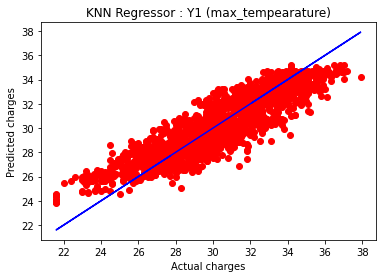

In [160]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test_1,y = max_temp_pred,color = 'r')
plt.plot(y_test_1,y_test_1,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('KNN Regressor : Y1 (max_tempearature)')
plt.show()

###  Y2 (Next_Tmin)

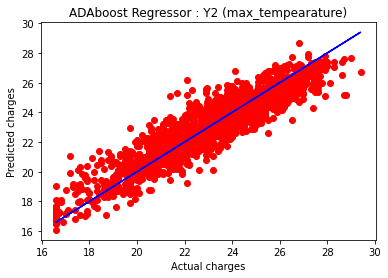

In [161]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test_2,y = min_temp_pred,color = 'r')
plt.plot(y_test_2,y_test_2,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('ADAboost Regressor : Y2 (max_tempearature)')
plt.show()

## Conclusion

### Y1 (Next_Tmax)

In [162]:
#lets make a dataframe of actual answers vs predicted answers
conclusion1 = pd.DataFrame((Temperature_Max.predict(x_test_1)[:],y_test_1[:]),index= ['Predicted','Actual'])
conclusion1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

we can see that actual and predicted values are very close for maximum temperature.

### Y2 (Next_Tmin)

In [163]:
#lets make a dataframe of actual answers vs predicted answers
conclusion2 = pd.DataFrame((Temperature_Min.predict(x_test_2)[:],y_test_2[:]),index= ['Predicted','Actual'])
conclusion2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

we can see that actual and predicted values are very close for minimum temperature.